## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1(l1_ratio))(x)
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
#超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.9
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [9]:
results = {}
"""
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

50000/50000 [==============================] - 24s 482us/step - loss: 2.4571 - accuracy: 0.0980 - val_loss: 2.4570 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 22s 439us/step - loss: 2.4571 - accuracy: 0.0980 - val_loss: 2.4570 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 18s 352us/step - loss: 2.4571 - accuracy: 0.0974 - val_loss: 2.4571 - val_accuracy: 0.1000
Experiment with Regulizer = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________________

50000/50000 [==============================] - 20s 392us/step - loss: 3.9242 - accuracy: 0.5698 - val_loss: 4.0429 - val_accuracy: 0.5244
Epoch 46/50
50000/50000 [==============================] - 16s 324us/step - loss: 3.8902 - accuracy: 0.5727 - val_loss: 4.0475 - val_accuracy: 0.5127
Epoch 47/50
50000/50000 [==============================] - 15s 308us/step - loss: 3.8609 - accuracy: 0.5753 - val_loss: 4.0006 - val_accuracy: 0.5192
Epoch 48/50
50000/50000 [==============================] - 17s 340us/step - loss: 3.8275 - accuracy: 0.5779 - val_loss: 4.1833 - val_accuracy: 0.4629
Epoch 49/50
50000/50000 [==============================] - 16s 323us/step - loss: 3.7980 - accuracy: 0.5788 - val_loss: 3.9807 - val_accuracy: 0.5155
Epoch 50/50
50000/50000 [==============================] - 21s 422us/step - loss: 3.7682 - accuracy: 0.5799 - val_loss: 3.9237 - val_accuracy: 0.5234
Experiment with Regulizer = 0.000000
Model: "model_1"
__________________________________________________________

50000/50000 [==============================] - 19s 387us/step - loss: 1.2202 - accuracy: 0.5725 - val_loss: 1.3694 - val_accuracy: 0.5143
Epoch 43/50
50000/50000 [==============================] - 18s 361us/step - loss: 1.2116 - accuracy: 0.5741 - val_loss: 1.3598 - val_accuracy: 0.5196
Epoch 44/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.2029 - accuracy: 0.5774 - val_loss: 1.3638 - val_accuracy: 0.5170
Epoch 45/50
50000/50000 [==============================] - 21s 417us/step - loss: 1.1949 - accuracy: 0.5807 - val_loss: 1.3539 - val_accuracy: 0.5197
Epoch 46/50
50000/50000 [==============================] - 18s 362us/step - loss: 1.1857 - accuracy: 0.5861 - val_loss: 1.3636 - val_accuracy: 0.5162
Epoch 47/50
50000/50000 [==============================] - 18s 354us/step - loss: 1.1782 - accuracy: 0.5869 - val_loss: 1.4256 - val_accuracy: 0.5043
Epoch 48/50
50000/50000 [==============================] - 20s 397us/step - loss: 1.1703 - accuracy: 0.5917 - va

50000/50000 [==============================] - 17s 346us/step - loss: 1.2205 - accuracy: 0.5703 - val_loss: 1.4343 - val_accuracy: 0.4852
Epoch 40/50
50000/50000 [==============================] - 18s 356us/step - loss: 1.2118 - accuracy: 0.5754 - val_loss: 1.3738 - val_accuracy: 0.5124
Epoch 41/50
50000/50000 [==============================] - 18s 350us/step - loss: 1.2037 - accuracy: 0.5769 - val_loss: 1.4184 - val_accuracy: 0.5024
Epoch 42/50
50000/50000 [==============================] - 18s 363us/step - loss: 1.1961 - accuracy: 0.5780 - val_loss: 1.4172 - val_accuracy: 0.4936
Epoch 43/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.1856 - accuracy: 0.5832 - val_loss: 1.3307 - val_accuracy: 0.5261
Epoch 44/50
50000/50000 [==============================] - 18s 358us/step - loss: 1.1767 - accuracy: 0.5863 - val_loss: 1.3482 - val_accuracy: 0.5175
Epoch 45/50
50000/50000 [==============================] - 18s 361us/step - loss: 1.1672 - accuracy: 0.5900 - va

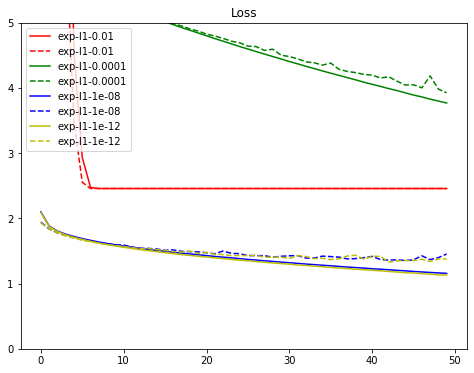

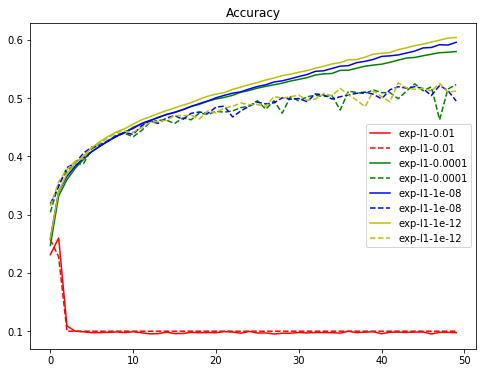

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()